# The Probability Density Function (PDF)

## Introduction
So far we have looked at discrete random variables and how to calculate/visualize their distribution functions. In this lesson, we shall deal with continuous variables and probability density function (pdf) as a way to model the probability of occurrence for such variables.

## Objectives
You will be able to:
* Understand the use of calculating PDFs for real valued random variables
* Differentiate between probability and probability densities
* Visualize Density Estimation plots for a given dataset in seaborn
* Calculate PDFs through interpolation 


## Continuous Variables

Continuous variables can take any real values. Think of it like this: If that number in the variable can keep counting, then its most probably a continuous variable.

### Example:

Let's say that the height of a person is 6.1 feet and thats where we normally stop. Or lets say we want to get a bit more accurate and call it 6.15 feet. 

But in reality the height could actually be ..

6.1520436512094802388472039874222 ………………………………………………… Feet. 

The dots show that the calculation can be ongoing infinitely based on what measures and equipment we use for calculating height. This is what we meant by  “keep counting”. 

<img src = "height.jpg" width= 200>

> We can not identify the exact value of a continuous variable

So height , weight, blood pressure  etc. and such other values would be categorized as continuous variable.

## Probability vs. Probability Density 

Continuous variables can take on an infinite number of variables. For example, you could have a random variable Y that represents possible heights for a number of individuals in a survey group can be shown as given below:
<img src="pdf1.png" width = 300>

Looking at above histogram we can see that most of the values lie around the mean (around 67 inches). As we move away from the mean on both directions, the frequency of observations reduce creating two tails at both ends. The red line above shows a probability "**Density**" function, as compared to Probability functions we saw with cdf and pmf. A Probability Density Function (pdf) helps identify the regions in the distribution where observations are more likely to occur i.e. it is more dense. Remember that while dealing with pmfs, we calculated the **mass** for each class. For the case of continuous variable, we do not have fixed number of possible outcomes as described above. so instead we create a density function.  

For the distribution above, the mean region has a high probability density as compared to tails which is reflected on y -axis. This is an example of a **Normal Distribution** which we shall look at next. 

>The probability density function(also called a probability distribution function) shown above shows all possible values for height, which for this case, has an infinite amount of possibilities. 

We can use probability density functions to answer a question like:
What is the probability that a person's height is between 60  and 70  inches? 
Written in notation, the question becomes:

> **P( 60 < Height < 70 )**

## Interpreting PDF

Probability functions are great for figuring out **intervals** because as shown above, it is hard to identify an exact point. A height of 6 feet (72 inches) is actually considered interval between say 5.99 feet and 6.01 feet which makes it an interval for dealing with this continuous variable. So we have to be careful when reading probability density functions, especially when it comes to exact numbers. For heights, What about the probability any person will weigh exactly 6 feet? Written in notation, the question would be:

> **P( Height = 72 )**

Looking at the graph, you might think that the probability of a person having height of exactly six feet it 0.05 or 5%, but this not accurate. The idea that 5% of people are **exactly** 6 ft tall is just not conceivable. Heights would differ in terms of millimeters, micrometers or even nanometers. The person could be 6.00012 or 5.99987 feet tall. In fact, the probability of someone being exactly 6ft is so tiny. it’s practically **zero**. So we need to define an interval to capture the value. If we set our interval as heights between say 71.9 and 72.1 inches, we can write this as:

> **P( 71.9 < Height < 72.1 )**

And now we can say this probability interval captures 5% of individuals in the data. The width of such an interval can be set according to nature of data under observation and also level of accuracy required. 

## The Area Under Curve

Another way to look at this is when plotting the “area” for exactly 72 inch, it would actually just be a 1-dimensional line, having no area at all (i.e. probability = 0). So we need to measure intervals for continuous variables as shown below:

![](pdf2.jpg)



The formal mathematical representation for calculating a area under curve is shown below:
![](formula.jpg)
> **pdf is the probability function F(x), such that x falls between two values (a and b), is equals to the integral (area under the curve) from a to b**

We shall look at this in detail when talking about probabilities with normal distributions. Lets move to learning some skills to estimate and plot such density functions in python. 

## Visualizing probability Density Functions

pdfs can be visualized using hitograms and density plots. We have had quite a bit of practice on histograms. We shall now look at how to plot a density plot for a distributions in python. 

#### Density Estimation and Plotting
 
A density plot is a "smoothed" version of a histogram estimated from the observations. Estimating the density function from given data could use parametric or non-parametric methods. 

**Parametric methods** use parameters like mean and standard deviation of given data and attempt to work out the **shape** of the distribution that the data belongs to. These may implement the a notion of maximum likelihood to **fit** and distribution to the given data.  

**Kernel density estimation** or KDE is a common  non-parametric estimation technique to plot a curve (the kernel) at every individual data point. These curves are then added to plot a smooth density estimation. The kernel most often used is a Gaussian (which produces a bell curve at each data point). Other kernels can be used in special cases when the underlying distribution is not normal. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Comparison_of_1D_histogram_and_KDE.png/1000px-Comparison_of_1D_histogram_and_KDE.png" width = 700>


The histogram (left) and kernel density estimate (right) are constructed using the same data. The 6 individual kernels are the red dashed curves, the kernel density estimate the blue curves. The tiny black vertical lines on x axes are called the "Rug plot". 



#### Seaborn!

At this stage , let us give you a quick intro. to another popular visualization library called **Seaborn**, which can do wonders for statistical visualizations. We shall quickly look into plotting density plots at this stage, and revisit it again in a later section to highlight its full potential. 

Let's import this module into our environment first.

In [26]:
!pip install seaborn
import seaborn as sns

You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


The function that we are interested in right now is  the `seaborn.distplot()` function in seaborn which can help visualize a distribution in a number of statistical ways including histograms, density plots, area plots with a huge range of coloring and customization features. 
```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```

Wow ..check out the amount of options there, an it returns a matplotlib axes object to further modify and prettify it. [Here is the official documentation](https://seaborn.pydata.org/generated/seaborn.distplot.html) - go explore. 

#### Get Some data

We shall use a dataset called Weight and Height dataset containing 10,000 observations about the heights and weights of individuals , grouped as male an female. Let's load the dataset in our python environment.

In [27]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd 

data = pd.read_csv('weight-height.csv')

print(data.head())
data.describe()

  Gender     Height      Weight
0   Male  73.847017  241.893563
1   Male  68.781904  162.310473
2   Male  74.110105  212.740856
3   Male  71.730978  220.042470
4   Male  69.881796  206.349801


,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


Let's plot the density plot for data in the `Height` column using seaborn `distplot()`. We shall create label and prettify this plot here to highlight the powerful visualization abilities of seaborn. For this data, we shall be plotting:
* a Box and Whiskers plot 
* a histogram 
* Non parametric Kernel Density Estimation plot
* Parametric distribution fit plot
* Provide options for customizations using keywords object specific _kws{}

.. all in a single go. 

In [ ]:
import scipy.stats as stats
# Create two vertical subplots sharing 15% and 85% of plot space
# sharex allows sharing of axes i.e. building multiple plots on same axes
fig, (ax, ax2) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize = (10,8) )

sns.distplot(data.Height, 
             hist=True, hist_kws={
                                  "linewidth": 2,
                                  "edgecolor" :'salmon',
                                  "alpha": 0.4, 
                                  "color":  "w",
                                  "label": "Histogram",
                                  },
             kde=True, kde_kws = {'linewidth': 3,
                                  'color': "blue",
                                  "alpha": 0.7,
                                  'label':'Kernel Density Estimation Plot'
                                 },
             fit= stats.norm, fit_kws = {'color' : 'green',
                                         'label' : 'parametric fit',
                                         "alpha": 0.7,
                                          'linewidth':3},
             ax=ax2)
ax2.set_title('Density Estimations')

sns.boxplot(x=data.Height, ax = ax,color = 'salmon')
ax.set_title('Box and Whiskers Plot')
ax2.set(ylim=(0, .08))
plt.ylim(0,0.11)
plt.legend()


/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


So you see how we can visualize multiple statistical aspects of a distribution with seaborn with such ease. This has saved us from calculating histograms, normalizing them , finding probabilities etc. You can further customize these plots to your heart's content. Have a look at official seaborn documentation for their color pellets, styles, labelling options etc. 

We can also use seaborn distplot to view the cdf function for constinuous variables. You are encouraged to use `distplot()` for quick visualizations around different aspects of distributions under study. 

/opt/conda/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


ImportError: Cumulative distributions are currentlyonly implemented in statsmodels.Please install statsmodels.

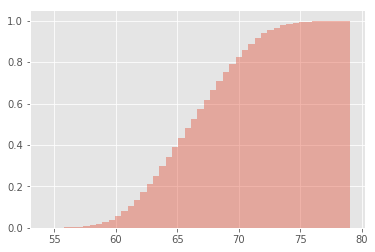

In [25]:
sns.distplot(data.Height,
             hist_kws=dict(cumulative=True),
             kde_kws=dict(cumulative=True));


## Interpolation

Another (rather naive - yet effective) way is to estimate a density function using interpolation between the peaks of histogram. We can use the np.histogram function to calculate histogram values and interpolate between these values to plot a density curve.\

ValueError: too many values to unpack (expected 2)

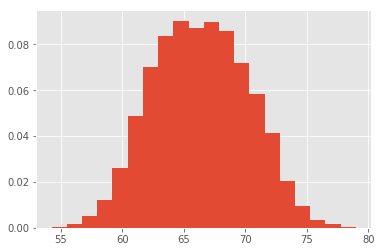

In [24]:
import numpy as np
n, bins = plt.hist(data.Height, 20, density=True)
n, bins



Here `n` are the values of histogram and `bins` are the bin positions along x -axis. We can interpolate between these values to calculate the points for density curve as shown below. 

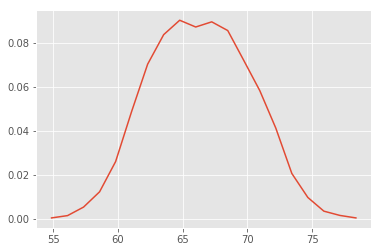

In [17]:
# Initialize numpy arrays according to number of bins with zeros to store interpolated values
pdfx = np.zeros(n.size)
pdfy = np.zeros(n.size)

# Interpolate through histogram bins 
# identify middle point between two neighbouring bins, in terms of x and y coords
for k in range(n.size):
    pdfx[k] = 0.5*(bins[k]+bins[k+1])
    pdfy[k] = n[k]

# plot the calculated curve
plt.plot(pdfx, pdfy)


There we have it. This plot reflects our density function. We can plot it on top of our normalized histogram now and get a complete picture of underlying data. 

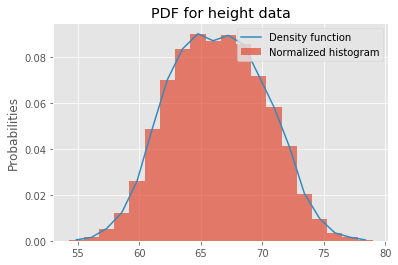

In [18]:
data.Height.plot.hist(bins = 20, normed=True, label = 'Normalized histogram', alpha = 0.7)
# plot the calculated curve
plt.plot(pdfx, pdfy, label = 'Density function')
plt.ylabel ('Probabilities')
plt.legend()
plt.title ('PDF for height data')
plt.show()

So here it is. Our normalized histogram with a probability density curve. We shall move to a lab and exercise a bit more on these ideas next to analyze this dataset. 


## Summary
In this lesson we looked at the probability density function and identified the difference between point probabilities that we saw with categorical variables, to probability density functions for continuous variables. We shall further explore these ideas in proceeding lessons. 